**1. Прочитайте базу "COVID_19_data"** и сделайте модель для сглаженой формы(экспоненциально) по приросту(первые разности) ил по прямому ряду для выздоровлений(или заболеваний) с глубиной прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" .

**2. Оцените ошибку модели из п.1 .**

**3. Сделайте вывод о том, как изменилась ошибка модели по значениям h.**

**4. Попробуйте предположить характер ряда** (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

а) Изменение температуры за окном :).

б) Количество денег, которые тратят покупатели в интернет магазине.

в) Вес растущего котенка.

г) Прирост объема деревьев в лесу от времени

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [3]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [4]:
covid = pd.read_csv('D:/AI/Machine learning/novel-corona-virus-2019-dataset/covid_19_data.csv')


In [5]:
covid.tail(3)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
15128,15129,04/14/2020,Yukon,Canada,2020-04-14 23:41:11,8.0,0.0,0.0
15129,15130,04/14/2020,Yunnan,Mainland China,2020-04-14 23:41:11,184.0,2.0,175.0
15130,15131,04/14/2020,Zhejiang,Mainland China,2020-04-14 23:41:11,1267.0,1.0,1242.0


Making a dataframe copy and working with it only
Выносим дату отдельным столбцом

In [6]:
covid_19 = covid.copy()
covid_19['Date']= pd.to_datetime(covid['ObservationDate']).dt.date

In [7]:
#checking date repeats; finding number of dates
if len(covid_19['Date'].value_counts())==covid_19['Date'].nunique():
    print(covid_19['Date'].nunique())

84


In [8]:
covid_by_date = covid_19.groupby(['Date'])['Confirmed','Deaths','Recovered'].sum()

In [9]:
covid_by_date.index = pd.to_datetime(covid_by_date.index)

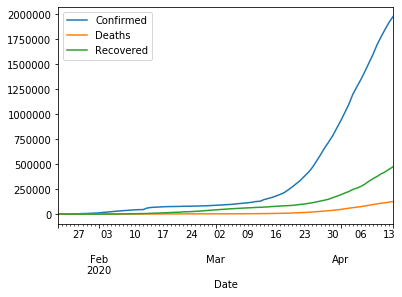

In [10]:
covid_by_date.plot()

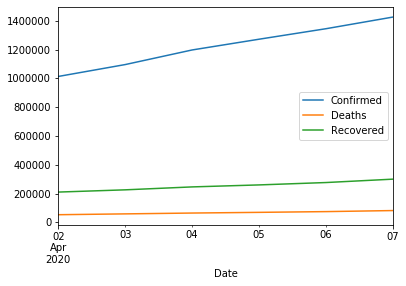

In [11]:
covid_by_date['2020-04-02': '2020-04-07'].plot()

statsmodels.tsa.stattools.adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)  
maxlag = n, autolag =None  
regression{‘c’,’ct’,’ctt’,’nc’}  
Constant and trend order to include in regression.  
‘c’ : constant only (default).  
‘ct’ : constant and trend.  
‘ctt’ : constant, and linear and quadratic trend.  
‘nc’ : no constant, no trend.  
autolag{‘AIC’, ‘BIC’, ‘t-stat’, None}  
Method to use when automatically determining the lag.  
if None, then maxlag lags are used.  
if ‘AIC’ (default) or ‘BIC’, then the number of lags is chosen to minimize the corresponding information criterion.  
‘t-stat’ based choice of maxlag. Starts with maxlag and drops a lag until the t-statistic on the last lag length is significant using a 5%-sized test.

**попробуем тест Дики Фуллера**

In [12]:
recovered_stat = sm.tsa.stattools.adfuller(covid_by_date['Recovered'].values, regression='ctt')
recovered_stat

(0.24922658783074125,
 0.9992496743656168,
 11,
 72,
 {'1%': -4.539881724858539,
  '5%': -3.9171398521090537,
  '10%': -3.605279090256344},
 1260.173032028794)

**ряд выздоровевших нестационарный**

**Попробуем в тесте Дики Фуллера лаги разной глубины:**

In [13]:
recovered_stat_maxlag9 = sm.tsa.stattools.adfuller(covid_by_date['Recovered'].values, maxlag=9, regression='ctt')

In [14]:
recovered_stat_maxlag9

(-5.213380625848756,
 0.0004325965054045213,
 9,
 74,
 {'1%': -4.535092737152785,
  '5%': -3.914769516514323,
  '10%': -3.603837484551754},
 1319.079190960525)

**Интересно, но при лаге = 9 ряд показывается как стационарный**

Первое значение кортежа ответа содержит показатель статистики теста.  
Второй элемент кортежа ответа: если он равен 0 - ряд стационарен, иначе нет.  
Третий параметр - длина временного отрезка (лага), который был использован при исследовании.  
Четвертый - число рассмотренных точек ряда.  
Пятый (словарь) содержит критические оценки по МакКинону для 1 % , 5 %, и 10 % вероятности отклонения гипотезы нестационарности ряда (Нулевая гипотеза теста — ряд не стационарен)  
Шестой - icbestfloat 
The maximized information criterion if autolag is not None. 

resstoreResultStore, optional
A dummy class with results attached as attributes.

In [15]:
# logarithm confirmed
covid_log = pd.Series(np.log(covid_by_date['Confirmed']))

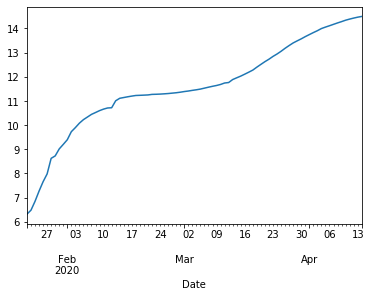

In [16]:
covid_log.plot()

Попробуем вручную

In [17]:
def straight_smoothing(series,h):    
    return series.rolling(window=h).mean()

In [18]:
covid_by_date['straight smoothing'] = straight_smoothing(covid_by_date['Recovered'], 2)
covid_by_date.head()

,Confirmed,Deaths,Recovered,straight smoothing
Date,,,,
2020-01-22,555.0,17.0,28.0,NaN
2020-01-23,653.0,18.0,30.0,29.0
2020-01-24,941.0,26.0,36.0,33.0
2020-01-25,1438.0,42.0,39.0,37.5
2020-01-26,2118.0,56.0,52.0,45.5


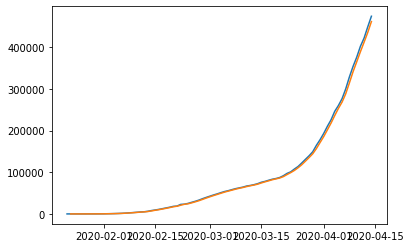

In [19]:
plt.plot(covid_by_date.loc[:, ['Recovered', 'straight smoothing']])

In [20]:
d_covid = pd.Series([], index=covid_by_date.index)
for day in covid_by_date.index:
    d_covid.append(covid_by_date[day] - ) = data['PJME_MW'].values[1:]-data['PJME_MW'].values[:-1]


SyntaxError: invalid syntax (<ipython-input-20-e76d8369b6a4>, line 3)

In [ ]:
plt.plot(data.iloc[:-1].index,d_data)
plt.xlabel('t')
plt.title('Потребление энергии, МВт')
plt.subplot(1,2,2)
plt.plot(brent_data.iloc[:-1].index,d_brent_data,'.')
plt.xlabel('t')
plt.title('Цена нефти Brent, USA Dollar')
plt.show()

In [ ]:
covid_by_date['Confirmed'].plot()
covid_by_date['Deaths'].plot()
covid_by_date['Recovered'].plot()
plt.xticks(label = covid_by_date.index.get_level_values('Date'), rotation=90)
plt.legend()
plt.show()

before 15th of March

In [ ]:
splitdate = pd.to_datetime('2020-03-15').date()
plt.plot((covid_by_date['Confirmed'].loc[:splitdate]), label='Confirmed')
plt.plot((covid_by_date['Deaths'].loc[:splitdate]), label='Deaths')
plt.plot((covid_by_date['Recovered'].loc[:splitdate]), label='Recovered')
plt.xticks(label = covid_by_date.index.get_level_values('Date'), rotation=90)
plt.legend()
plt.show()

from 100 confirmed cases to 100

In [ ]:
covid_by_date.loc[((covid_by_date['Confirmed'] > 100)& (covid_by_date['Confirmed'] < 1000)), :].plot()
plt.xticks(label = covid_by_date.index.get_level_values('Date'), rotation=90)

plt.show()

Посмотрим на них в цифрах

In [ ]:
cases_100_1000 = covid_by_date.loc[((covid_by_date['Confirmed'] > 100)& (covid_by_date['Confirmed'] < 1000)), :]
cases_100_1000

Сделаем первые разности (производную)

In [ ]:
covid_by_date.diff(1).plot()
plt.xticks(label = covid_by_date.index.get_level_values('Date'), rotation=90)

plt.show()

План - посмотреть отрезки с пиками и посмотреть отдельно данные по нью-йорку и нью-джерси


**3. вариант 2)** Сделайте ресемплинг COVID19 на интервалы 3 дня, неделя, 2 недели.Постройте график изменения среднего по выборке и среднего отклонения по выборке на группах для интервалах 3 дня, неделя, 2 недели (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )

In [ ]:
us_3day = covid_by_date.resample("3D").std()
us_week = covid_by_date.resample("W").std()
us_2weeks = covid_by_date.resample("2W").std()

In [ ]:
us_3day.head(3)

In [ ]:
plt.figure(figsize = (20, 6))

# интервалы 3 дня
plt.subplot(1,3,1)
plt.scatter(us_3day.index, us_3day['Confirmed'])
plt.scatter(us_3day.index, us_3day['Deaths'])
plt.scatter(us_3day.index, us_3day['Recovered'])
plt.xticks(label = us_3day.index, rotation=90)
plt.title(f'стандартное отклонение интервалы 3 дня')

# неделя
plt.subplot(1,3,2)
plt.plot(us_week.index, us_week)
plt.xticks(label = us_week.index, rotation=90)
plt.title(f'интервал неделя')

#  2 недели
plt.subplot(1,3,3)
plt.plot(us_2weeks.index, us_2weeks)
plt.xticks(label = us_2weeks.index, rotation=90)
plt.title(f'интервал 2 недели')

In [ ]:
us_3day_mean = covid_by_date.resample("3D").mean()
us_week_mean = covid_by_date.resample("W").mean()
us_2weeks_mean = covid_by_date.resample("2W").mean()

In [ ]:
plt.figure(figsize = (20, 6))

# интервалы 3 дня
plt.subplot(1,3,1)
plt.plot(us_3day_mean.index, us_3day_mean)
plt.xticks(label = us_3day_mean.index, rotation=90)
plt.legend(['Confirmed','Deaths','Recovered'])
plt.title(f'интервалы 3 дня')

# неделя
plt.subplot(1,3,2)
plt.plot(us_week_mean.index, us_week_mean)
plt.xticks(label = us_week_mean.index, rotation=90)
plt.legend(['Confirmed','Deaths','Recovered'])
plt.title(f'интервал неделя')

#  2 недели
plt.subplot(1,3,3)
plt.plot(us_2weeks_mean.index, us_2weeks_mean)
plt.xticks(label = us_2weeks_mean.index, rotation=90)
plt.legend(['Confirmed','Deaths','Recovered'])
plt.title(f'интервал 2 недели')

**4. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.**

Скачки в темпах роста и в среднеквадратичном отклонении по recovered и confirmed, а по смертям нет. Возможно зависит от процесса тестирования, его темпы могут быть различными. Странно, что в . Необходимо посмотреть те же показатели но по разным штатам, возможно, что там плавные однонаправленные изменения или по нормальное распределение.


In [ ]:
#data with most deaths данные с уровнем смертности >500
mass_deaths_data = covid_usa.loc[covid_usa['Deaths']>500, :]
#NB there are counties/provinces, wich for some periods are given separately from their states

In [ ]:
# список штатов с большим уровнем
states = mass_deaths_data['Province/State'].value_counts().index

In [ ]:
states

In [ ]:
# данные по самым пострадавшим штатам (по смертям)
covid_us_maxdeaths = covid_usa.loc[covid_usa['Province/State'].isin(states), :]

In [ ]:
# in one state plain data
for state in states[:1]:
    plt.plot(covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                    ['Date']],
             covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                    ['Confirmed','Deaths','Recovered']].diff(1) )
    plt.xticks(label = covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                              ['Date']], rotation=90)
    plt.legend(['Confirmed','Deaths','Recovered'])

In [ ]:
# differenciating death rates in max affected states
for state in states:
    plt.plot(covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                    ['Date']],
             covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                    ['Deaths']].diff(1), label=state)
    plt.xticks(label = covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                              ['Date']], rotation=90)
    plt.legend()

In [ ]:
# death rates in max affected states
for state in states:
    plt.plot(covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                    ['Date']],
             covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                    ['Deaths']], label=state)
    plt.xticks(label = covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                              ['Date']], rotation=90)
    plt.legend()

In [ ]:
# differenciating confirmed/death/recovered/ rates in max affected states
for state in states:
    
    plt.plot(covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                    ['Date']],
             covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                    ['Deaths']].diff(1), label=state)
    plt.xticks(label = covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]),
                                              ['Date']], rotation=90)
    plt.legend()

### сгладим данные, попробуем собрать среднее за каждые 3 дня

In [ ]:
covid_us_maxdeaths.index = pd.to_datetime(covid_us_maxdeaths['Date'])

In [ ]:
#
for state in states:
    one_state_deaths = covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]), :]
    three_day_mean = one_state_deaths.resample("3D").mean()
    plt.plot(three_day_mean.index, three_day_mean['Deaths'], label=state)
    plt.xticks(label = three_day_mean.index, rotation=90)
    plt.legend()

In [ ]:
# diff
for state in states:
    one_state_deaths = covid_us_maxdeaths.loc[covid_us_maxdeaths['Province/State'].isin([state]), :]
    three_day_mean = one_state_deaths.resample("3D").mean()
    plt.scatter(three_day_mean.index, three_day_mean['Deaths'].diff(1))
    plt.plot(three_day_mean.index, three_day_mean['Deaths'].diff(1), label=state)
    plt.xticks(label = three_day_mean.index, rotation=90)
    plt.legend()

**При усреднении в пределах трех дней скачки темпов роста сглаживаются**
Дополнительные выводы делать сложно, так как рост даже до пика еще не дошел и пока даже прирост немного снизился только на последнем отрезке. В Нью-Йорке ситуация явно из всех учитываемых мест доведена до самой критической, а вот в Луизиане, кажется, удается flatten the curve.  Но,по крайней мере, признаков манипуляций не видно. Кажется, методику учета смертности они не меняли на всем протяжении измерений. BTW даже в NY пока хватает аппаратов и, прогнозируется, что хватит. Тем более хватает коек. Будет интересно посмотреть на данные через пару недель. В наши пока не хочется заглядывать, ибо как у нас "учитывают", я знаю очень хорошо.